In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch import nn, optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load dataset
df = pd.read_csv("C:\\Users\\harib\\Downloads\\walmart\\Walmart.csv")  # Replace with your actual file path

# Display first few rows



In [46]:
print(df.head())

   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  


In [47]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
None


In [48]:
print(df.isnull().sum())

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [49]:
print(df.describe())

             Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.232807     14.313000  


In [50]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')


c:\Users\harib\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


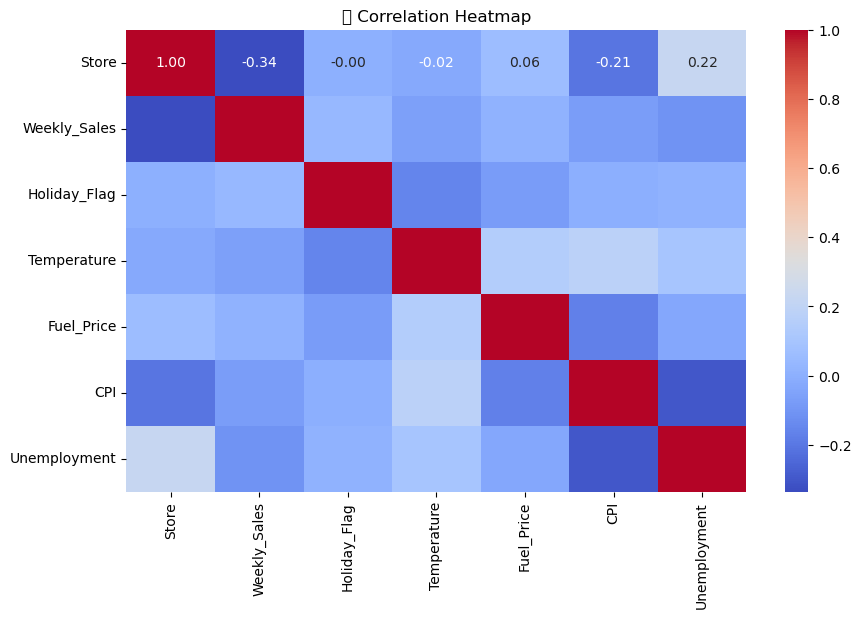

In [51]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Plot correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("🔹 Correlation Heatmap")
plt.show()


c:\Users\harib\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\harib\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


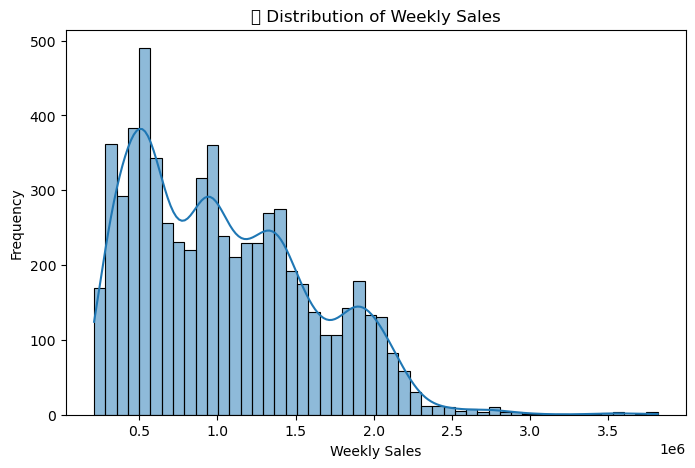

In [52]:
plt.figure(figsize=(8,5))
sns.histplot(df['Weekly_Sales'], bins=50, kde=True)
plt.title("🔹 Distribution of Weekly Sales")
plt.xlabel("Weekly Sales")
plt.ylabel("Frequency")
plt.show()

C:\Users\harib\AppData\Local\Temp\ipykernel_3172\3661270814.py:9: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from current font.
  plt.tight_layout()


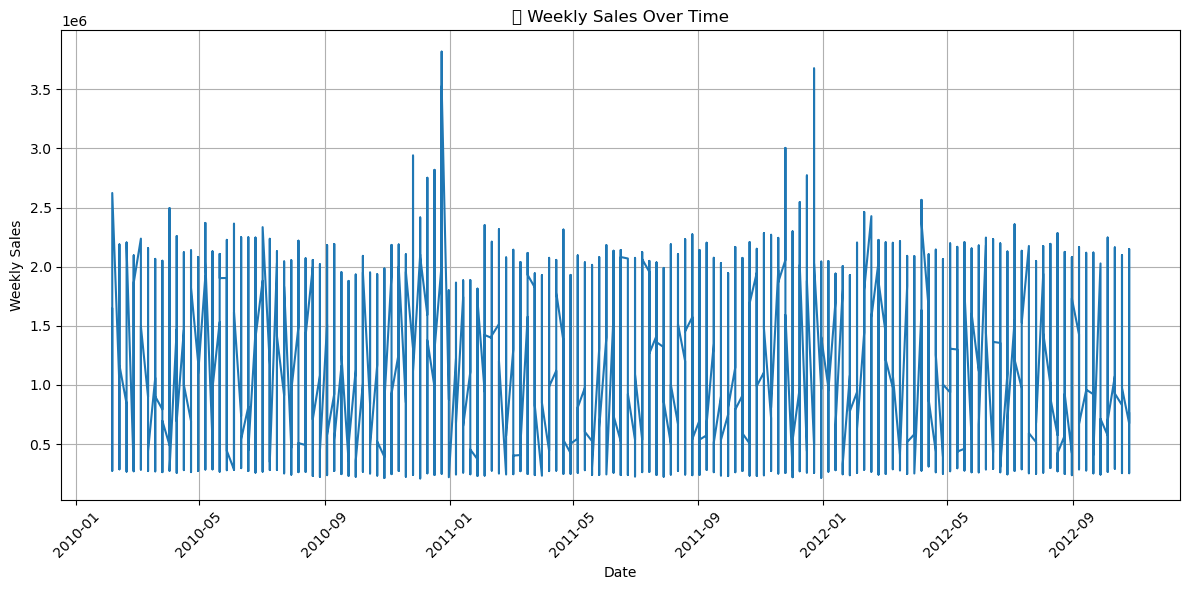

In [53]:
plt.figure(figsize=(12,6))
df_sorted = df.sort_values('Date')
plt.plot(df_sorted['Date'], df_sorted['Weekly_Sales'])
plt.title("🔹 Weekly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [54]:
features = ['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
target = 'Weekly_Sales'

In [55]:
X = df[features]  # Inputs
y = df[target] 

In [56]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [58]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5148, 6)
X_test shape: (1287, 6)
y_train shape: (5148,)
y_test shape: (1287,)


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values.reshape(-1, 1), dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values.reshape(-1, 1), dtype=torch.float32)

In [ ]:
class ANNModel(nn.Module):
    def __init__(self):
        super(ANNModel, self).__init__()
        self.fc1 = nn.Linear(6, 64)     # 6 input features
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)     # 1 output (Weekly Sales)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [62]:
model = ANNModel()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Model summary (optional)
print(model)

ANNModel(
  (fc1): Linear(in_features=6, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=1, bias=True)
  (relu): ReLU()
)


In [63]:
# Set training parameters
epochs = 100
batch_size = 64

# Store training loss for plotting
train_losses = []

# Training loop
for epoch in range(epochs):
    model.train()

    permutation = torch.randperm(X_train_tensor.size()[0])
    epoch_loss = 0.0

    for i in range(0, X_train_tensor.size()[0], batch_size):
        indices = permutation[i:i + batch_size]
        batch_x, batch_y = X_train_tensor[indices], y_train_tensor[indices]

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(batch_x)

        # Loss computation
        loss = criterion(outputs, batch_y)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    avg_loss = epoch_loss / (X_train_tensor.size()[0] // batch_size)
    train_losses.append(avg_loss)

    if (epoch+1) % 10 == 0 or epoch == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}")


Epoch [1/100], Loss: 1428606011801.6001
Epoch [10/100], Loss: 1412247817420.8000
Epoch [20/100], Loss: 1322251906252.8000
Epoch [30/100], Loss: 1139696057548.8000
Epoch [40/100], Loss: 893465539379.2000
Epoch [50/100], Loss: 647029005516.8000
Epoch [60/100], Loss: 462142729011.2000
Epoch [70/100], Loss: 364321912832.0000
Epoch [80/100], Loss: 325472379699.2000
Epoch [90/100], Loss: 308576539648.0000
Epoch [100/100], Loss: 299395061145.6000


In [64]:
model.eval()

# 2️⃣ Disable gradient tracking for testing
with torch.no_grad():
    predictions = model(X_test_tensor)

# 3️⃣ Convert predictions and targets to NumPy arrays
preds = predictions.numpy()
true = y_test_tensor.numpy()

# 4️⃣ Calculate metrics
mse = mean_squared_error(true, preds)
rmse = np.sqrt(mse)
mae = mean_absolute_error(true, preds)

print(f"📊 Mean Squared Error (MSE): {mse:.2f}")
print(f"📉 Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"📍 Mean Absolute Error (MAE): {mae:.2f}")

📊 Mean Squared Error (MSE): 298342285312.00
📉 Root Mean Squared Error (RMSE): 546207.19
📍 Mean Absolute Error (MAE): 438167.31


C:\Users\harib\AppData\Local\Temp\ipykernel_3172\4198975840.py:10: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from current font.
  plt.tight_layout()
c:\Users\harib\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128302 (\N{CRYSTAL BALL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


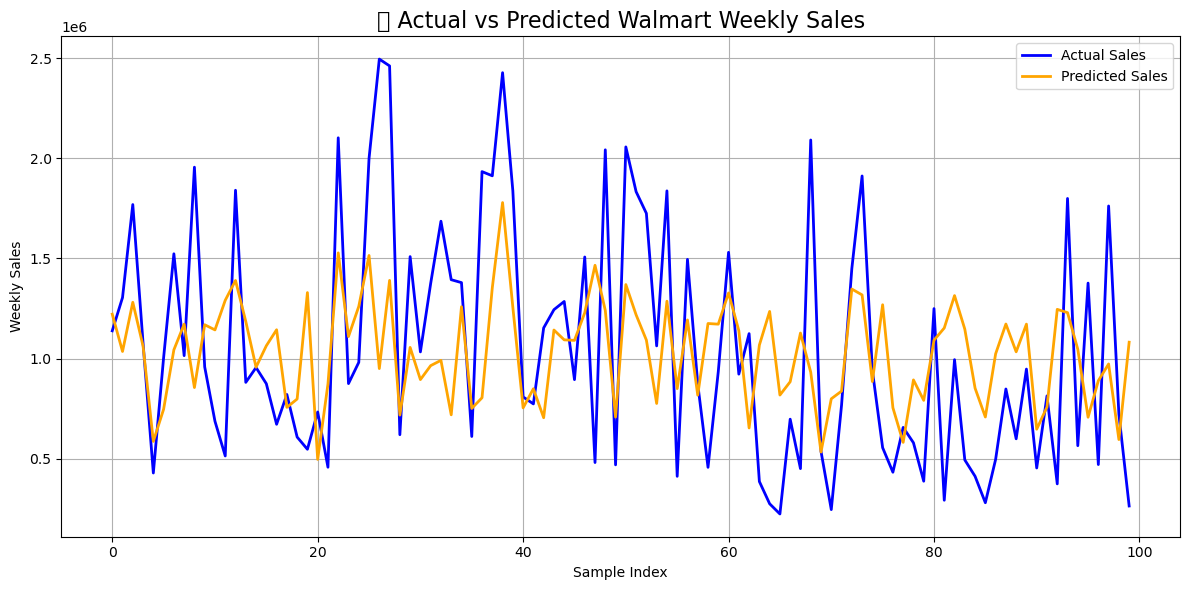

In [65]:
plt.figure(figsize=(12, 6))
plt.plot(true[:100], label='Actual Sales', color='blue', linewidth=2)
plt.plot(preds[:100], label='Predicted Sales', color='orange', linewidth=2)

plt.title("🔮 Actual vs Predicted Walmart Weekly Sales", fontsize=16)
plt.xlabel("Sample Index")
plt.ylabel("Weekly Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()